## Modeling and Simulation in Python

Modeling Elk and Wolf Populations

Richard Gao

In [59]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [60]:
init = State(x = 1, #Elk
             y = 1) #Wolf
# init /= np.sum(init) Convert to percentage of whole

,values
x,1
y,1


In [67]:
system = System(elk_birthrate=.05,
                elk_deathrate=.1,
                wolf_birthrate=.1,
                wolf_deathrate=.1,
                t0=0,
                t_end=1050,
                init=init)

,values
elk_birthrate,0.05
elk_deathrate,0.1
wolf_birthrate,0.1
wolf_deathrate,0.1
t0,0
t_end,1050
init,x 1 y 1 dtype: int64


In [69]:
def update_func(state, t, system):
    unpack(system)
    x, y = state
    
    delta_x = x * ((elk_birthrate * x) - (elk_deathrate * x * y))
    delta_y = y * ((wolf_birthrate * x * y) - (wolf_deathrate * y))
    
    x += delta_x
    y += delta_y
    
    return State(x=x, y=y)

In [71]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [72]:
def plot_results(x, y):
    plot(x, '--', label='elk')
    plot(y, '-', label='wolves')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [73]:
results = run_simulation(system, update_func);

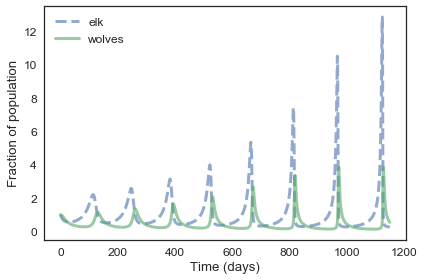

In [58]:
plot_results(results.x, results.y)